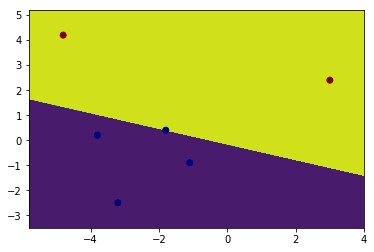

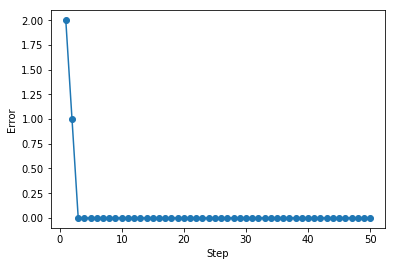

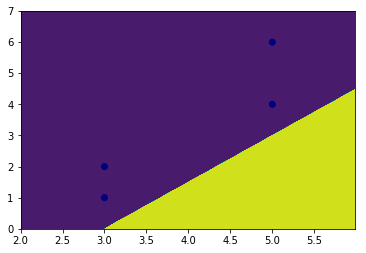

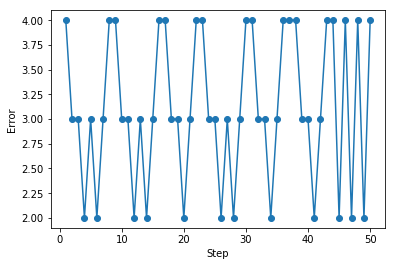

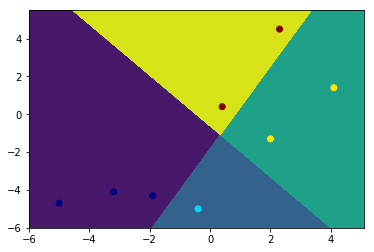

In [32]:
import numpy as np
import matplotlib.pyplot as plt


class Perceptron():

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
            
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) < 0.0, 0, 1)

class Net():
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        self.cnt = 0
        self.dct = {}
    def train(self, X, y):
        self.net = []
        if (len(y.shape) == 1):
            ppn = Perceptron(self.eta, self.epochs)
            ppn.train(X, y)
            self.net.append(ppn)
        else:  
            for i in range(len(y)):
                ppn = Perceptron(self.eta, self.epochs)
                ppn.train(X, y[i])
                self.net.append(ppn)
    def predict(self, X):
        
        tmp = []
       
        for ppn in self.net:
            tmp.append(ppn.predict(X))
        key = ['' for i in range(tmp[0].size)]
        for el in tmp:
            for i, digit in enumerate(el):
                key[i] += str(digit)
        res = np.zeros(tmp[0].shape)
        for i, k in enumerate(key):
            if k not in self.dct:
                self.dct.update({k : self.cnt})
                self.cnt +=1
            res[i] = self.dct[k]
        return res
            
def print_res(X, net):
    h = .01 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    fig, ax = plt.subplots()
    
    Z = net.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape) 
    ax.contourf(xx, yy, Z)
    X_p  = net.predict(X)
    cmap = plt.cm.jet
    ax.scatter(X[:, 0], X[:, 1], c = X_p, cmap = cmap)
    plt.show()
    

def main():
    X = np.array([[3,-3.8, -1.8, -1.1, -3.2, -4.8], 
                  [2.4, 0.2, 0.4, -0.9, -2.5, 4.2]])
    Y = np.array([0, 1, 1, 1, 1, 0])
    X = np.transpose(X)
    
    
    net = Net(epochs=50, eta=0.1)
    net.train(X,Y)
    print_res(X, net)
    
    plt.plot(range(1, len(net.net[0].errors_)+1), net.net[0].errors_, marker='o')
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.show()
    
    X = np.array([[3, 3, 5, 5], 
                  [2, 1, 6, 4]])
    Y = np.array([0, 1, 1, 0])
    X = np.transpose(X)
    net = Net(epochs=50, eta=0.1)
    net.train(X,Y)
    print_res(X, net)
    
    plt.plot(range(1, len(net.net[0].errors_)+1), net.net[0].errors_, marker='o')
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.show()
    
    '''ppn = Perceptron(epochs=50, eta=0.1)
    
    
    ppn.train(X, Y)
    print(ppn.w_)
    
    print_res(X, ppn)
    

    
    X = np.array([[2, 2.3, 0.4, -1.9, -3.2, -0.4, 4.1, -5],
                 [-1.3, 4.5, 0.4, -4.3, -4.1, -5, 1.4, -4.7]])
    Y = np.array([[0, 0, 0, 1, 1, 1, 0, 1],
                  [1, 0, 0, 0, 0, 1, 1, 0]])
    X = np.transpose(X)
    ppn1 = Perceptron(epochs=10, eta=0.1)
    ppn2 = Perceptron(epochs=10, eta=0.1)
    ppn1.train(X, Y[0])
    ppn2.train(X, Y[1])
    print_res(X, ppn1, ppn2)'''
    X = np.array([[2, 2.3, 0.4, -1.9, -3.2, -0.4, 4.1, -5],
                 [-1.3, 4.5, 0.4, -4.3, -4.1, -5, 1.4, -4.7]])
    Y = np.array([[0, 0, 0, 1, 1, 1, 0, 1],
                  [1, 0, 0, 0, 0, 1, 1, 0]])
    X = np.transpose(X)
    net2 = Net(epochs=50, eta=0.1)
    net2.train(X,Y)
    print_res(X, net2)
    
    
if __name__ == '__main__':
    main()